In [ ]:
Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

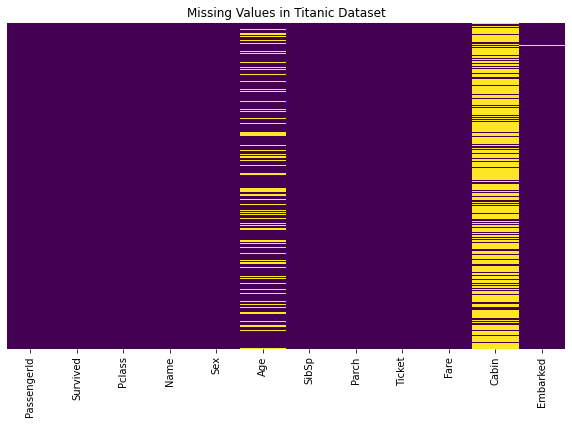

Unique values in Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. 

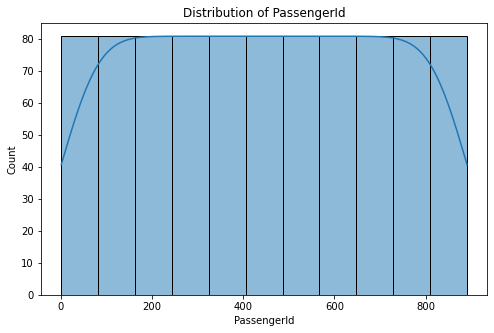

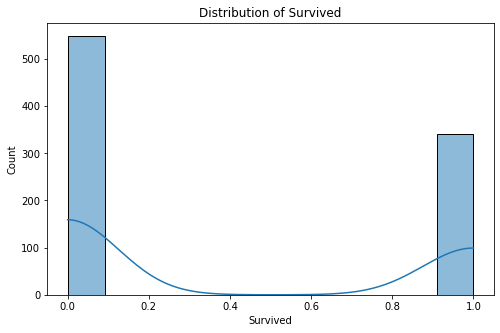

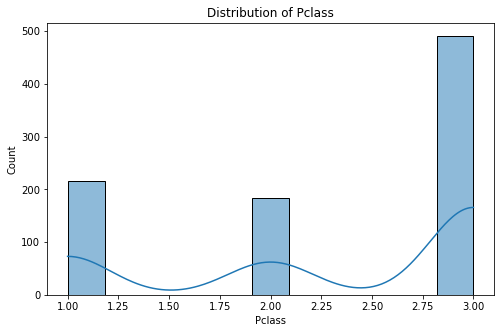

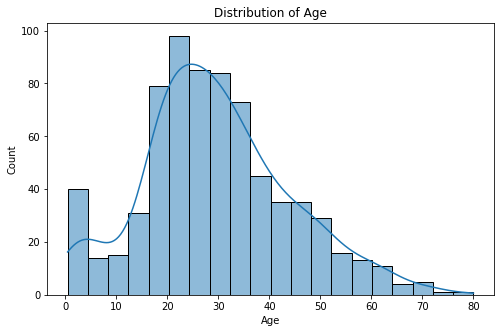

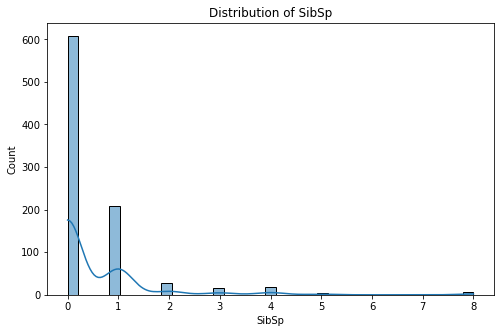

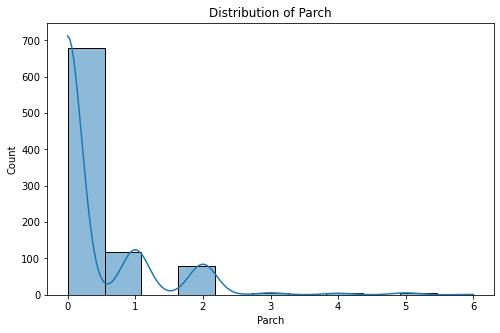

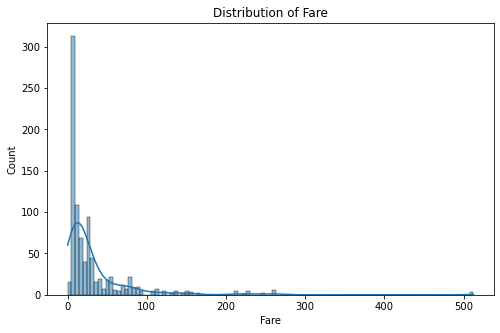

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         

KeyError: 'Cabin'

In [1]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"
titanic_data = pd.read_csv(url)
print(titanic_data.head())
print(titanic_data.info())
print(titanic_data.describe())
print("Missing values:")
print(titanic_data.isnull().sum())
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Titanic Dataset")
plt.show()
categorical_cols = titanic_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {titanic_data[col].unique()}")
numerical_cols = titanic_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(titanic_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)
print("Missing values after handling:")
print(titanic_data.isnull().sum())
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)
print(titanic_data.head())
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {'Ms': 'Miss', 'Mlle': 'Miss', 'Mme': 'Mrs', 'Major': 'Other', 'Col': 'Other', 'Dr': 'Other',
                 'Rev': 'Other', 'Capt': 'Other', 'Lady': 'Other', 'Sir': 'Other', 'Don': 'Other', 'Dona': 'Other',
                 'Jonkheer': 'Other', 'Countess': 'Other'}
titanic_data['Title'] = titanic_data['Title'].map(title_mapping).fillna(titanic_data['Title'])
titanic_data = pd.get_dummies(titanic_data, columns=['Title'], drop_first=True)
titanic_data.drop('Name', axis=1, inplace=True)
print(titanic_data.head())
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
print(titanic_data.head())
titanic_data['HasCabin'] = titanic_data['Cabin'].notnull().astype(int)
titanic_data.drop('Cabin', axis=1, inplace=True)
print(titanic_data.head())
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
numerical_cols = titanic_data.select_dtypes(include=['int64', 'float64']).columns
titanic_data[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.show()
categorical_cols = titanic_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=titanic_data, palette="viridis")
    plt.title(f'Bar Chart of {col}')
    plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
random_forest.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
lr_predictions = logistic_regression.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, rf_predictions) * 100))
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, lr_predictions) * 100))
print("Support Vector Machine Accuracy: {:.2f}%".format(accuracy_score(y_test, svm_predictions) * 100))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_predictions))
from sklearn.model_selection import GridSearchCV
random_forest = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)
best_random_forest = RandomForestClassifier(**best_params, random_state=42)
best_random_forest.fit(X_train, y_train)
best_rf_predictions = best_random_forest.predict(X_test)
print("\nTuned Random Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, best_rf_predictions) * 100))
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, best_rf_predictions))
print("\nConfusion Matrix for Tuned Random Forest:")
print(confusion_matrix(y_test, best_rf_predictions))
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def print_evaluation_metrics(y_true, y_pred):
    print("Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))
    print("Precision: {:.2f}".format(precision_score(y_true, y_pred)))
    print("Recall: {:.2f}".format(recall_score(y_true, y_pred)))
    print("F1 Score: {:.2f}".format(f1_score(y_true, y_pred)))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
print("\nEvaluation Metrics for Random Forest:")
print_evaluation_metrics(y_test, best_rf_predictions)
print("\nEvaluation Metrics for Logistic Regression:")
lr_predictions = logistic_regression.predict(X_test)
print_evaluation_metrics(y_test, lr_predictions)
print("\nEvaluation Metrics for Support Vector Machine:")
svm_predictions = svm_classifier.predict(X_test)
print_evaluation_metrics(y_test, svm_predictions)
new_data = pd.read_csv('path/to/new_data.csv')
new_data_predictions = best_random_forest.predict(new_data)
print("Predictions for New Data:")
print(new_data_predictions)


In [ ]:
Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
https://github.com/dsrscientist/DSData


In [2]:
import pandas as pd
dataset_path = "happiness_score_dataset.csv"
df = pd.read_csv(dataset_path)
print(df.head())
print(df.info())
print(df.describe())
import matplotlib.pyplot as plt
plt.hist(df['Happiness Score'], bins=20, edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Score')
plt.show()
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)
import seaborn as sns
numerical_cols = df.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
import seaborn as sns
numerical_cols = df.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset_path = "happiness_score_dataset.csv"
df = pd.read_csv(dataset_path)
print(df.head())
print(df.describe())
sns.pairplot(df, vars=['Happiness Score', 'GDP per Capita', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust Government Corruption'])
plt.show()
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
plt.figure(figsize=(8, 6))
sns.histplot(df['Happiness Score'], kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per Capita', y='Happiness Score', data=df)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()
df['GDP_to_Life_Expectancy'] = df['GDP per Capita'] / df['Life Expectancy']
new_features = ['GDP_to_Life_Expectancy']
all_features = df.columns.tolist() + new_features
corr_matrix = df[all_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with New Features')
plt.show()
target_corr = df.corr()['Happiness Score'].sort_values(ascending=False)
print(target_corr)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df.drop('Happiness Score', axis=1)
y = df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
coefficients = model.coef_
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = abs(coef_df['Coefficient'])
sorted_coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
print(sorted_coef_df)
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coef_df)
plt.title('Feature Importance in Predicting Happiness Score')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'happiness_score_dataset.csv'